In [ ]:
!pip install torchtext==0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.2 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.1
    Uninstalling torchtext-0.15.1:
      Successfully uninstalled torchtext-0.15.1


In [ ]:
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
from torchtext import data
from torchtext import datasets
from torchtext.vocab import GloVe
import string
import time
import random
import numpy as np 


In [ ]:
# random deletion

def random_deletion(sentence, p):
    # randomly delete some words
    remaining = list(filter(lambda x: random.uniform(0,1) > p, sentence))
    # if all words are deleted, return the same sentence
    if len(remaining) == 0:
        return sentence
    else:
        return remaining
        

def IMDB_r_delete(train, test):
  # apply random deletion to the input text of each example in the train set
    for example in train.examples:
      example.text = random_deletion(example.text, p=0.3) 

  # apply random deletion to the input text of each example in the test set
    for example in test.examples:
      example.text = random_deletion(example.text, p=0.3) 

    return train, test

In [ ]:
# dataloader

def tokenize(input):
    """
        Naive tokenizer, that lower-cases the input
        and splits on punctuation and whitespace
    """
    input = input.lower()
    for p in string.punctuation:
        input = input.replace(p," ")
    return input.strip().split()


def num2words(vocab,vec):
    """
        Converts a vector of word indicies
        to a list of strings
    """
    return [vocab.itos[i] for i in vec]

def get_imdb(batch_size,max_length):

    # Defines a datatype together with instructions for converting to Tensor.
    # lower: Whether to lowercase the text in this field. Default: False.
    # include_lengths: Whether to return a tuple of a padded minibatch and a list containing the lengths of each
    # examples, or just a padded minibatch. Default: False.
    # batch_first: Whether to produce tensors with the batch dimension first. Default: False.
    # tokenize: The function used to tokenize strings using this field into sequential examples. If "spacy", the SpaCy
    # English tokenizer is used. Default: str.split.
    TEXT = data.Field(lower=True, include_lengths=True, batch_first=True, tokenize=tokenize, fix_length=max_length)
    # sequential: Whether the datatype represents sequential data. If False, no tokenization is applied. Default: True.
    # unk_token: The string token used to represent OOV words. Default: "<unk>".
    # pad_token: The string token used as padding. Default: "<pad>".
    LABEL = data.Field(sequential=False, unk_token=None, pad_token=None)

    print("Loading data..\n")

    # make splits for data
    train, test = datasets.IMDB.splits(TEXT, LABEL)

    # print information about the data
    print('train.fields', train.fields)
    print('len(train)', len(train))
    print('len(test)', len(test))
    print("")

    # random deletion —— enable this for random deletion data augmentation
    #train, test = IMDB_r_delete(train, test)

    # build the vocabulary
    TEXT.build_vocab(train, vectors=GloVe(name='42B', dim=300,max_vectors=500000))
    LABEL.build_vocab(train)

    # print vocab information
    print('len(TEXT.vocab)', len(TEXT.vocab))
    print('TEXT.vocab.vectors.size()', TEXT.vocab.vectors.size())

    # make iterator for splits
    train_iter, test_iter = data.BucketIterator.splits(
        (train, test), batch_size=batch_size)

    return train_iter, test_iter, TEXT.vocab.vectors, TEXT.vocab

if __name__ == "__main__":
    """
        If run seperately, does a simple sanity check,
        by printing different values,
        and counting labels
    """
    train, test, vectors, vocab = get_imdb(1,50)

    from collections import Counter
    print(list(enumerate(vocab.itos[:100])))
    cnt = Counter()
    for i,b in enumerate(iter(train)):
        if i > 2: 
          break
        print(i,num2words(vocab,b.text[0][0].numpy()))
        cnt[b.label[0].item()] += 1
    print(cnt)


Loading data..

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:03<00:00, 24.7MB/s]


train.fields {'text': <torchtext.data.field.Field object at 0x7f33ccca1790>, 'label': <torchtext.data.field.Field object at 0x7f33ccca1e20>}
len(train) 25000
len(test) 25000



.vector_cache/glove.42B.300d.zip: 1.88GB [05:53, 5.31MB/s]                            
100%|█████████▉| 499999/500000 [00:56<00:00, 8786.82it/s]


len(TEXT.vocab) 75396
TEXT.vocab.vectors.size() torch.Size([75396, 300])
[(0, '<unk>'), (1, '<pad>'), (2, 'the'), (3, 'and'), (4, 'a'), (5, 'of'), (6, 'to'), (7, 'is'), (8, 'br'), (9, 'it'), (10, 'in'), (11, 'i'), (12, 'this'), (13, 'that'), (14, 's'), (15, 'was'), (16, 'as'), (17, 'for'), (18, 'with'), (19, 'movie'), (20, 'but'), (21, 'film'), (22, 't'), (23, 'you'), (24, 'on'), (25, 'not'), (26, 'he'), (27, 'are'), (28, 'his'), (29, 'have'), (30, 'be'), (31, 'one'), (32, 'all'), (33, 'at'), (34, 'they'), (35, 'by'), (36, 'an'), (37, 'who'), (38, 'so'), (39, 'from'), (40, 'like'), (41, 'there'), (42, 'her'), (43, 'or'), (44, 'just'), (45, 'about'), (46, 'out'), (47, 'if'), (48, 'has'), (49, 'what'), (50, 'some'), (51, 'good'), (52, 'can'), (53, 'more'), (54, 'she'), (55, 'when'), (56, 'very'), (57, 'up'), (58, 'time'), (59, 'no'), (60, 'even'), (61, 'my'), (62, 'would'), (63, 'which'), (64, 'story'), (65, 'only'), (66, 'really'), (67, 'see'), (68, 'their'), (69, 'had'), (70, 'we'), (7

In [ ]:
# pos

def get_pos_onehot(length):
    # initial zero matrix [length, length]
    onehot = torch.zeros(length, length)
    # torch.arrange(length).long() 生成[0-length]的tensor，.view(-1, 1)转变为length行，1列
    idxs = torch.arange(length).long().view(-1, 1)
    # onehot.scatter_(1, idxs, 1)生成[idxs, idxs]的对角单位阵
    onehot.scatter_(1, idxs, 1)
    return onehot


if __name__ == "__main__":
    print(get_pos_onehot(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [ ]:
# model

#from pos import get_pos_onehot


class MultiHeadAttention(nn.Module):
    """
        A multihead attention module,
        using scaled dot-product attention.
    """

    def __init__(self, input_size, hidden_size, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_heads = num_heads

        self.head_size = int(self.hidden_size / num_heads)
        # weighted sum
        self.q_linear = nn.Linear(self.input_size, self.hidden_size)
        self.k_linear = nn.Linear(self.input_size, self.hidden_size)
        self.v_linear = nn.Linear(self.input_size, self.hidden_size)
        #
        self.joint_linear = nn.Linear(self.hidden_size, self.hidden_size)

        self.softmax = nn.Softmax(dim=-1)

    def forward(self, q, k, v):
        # project the queries, keys and values by their respective weight matrices
        q_proj = self.q_linear(q).view(q.size(0), q.size(1), self.num_heads, self.head_size).transpose(1, 2)
        k_proj = self.k_linear(k).view(k.size(0), k.size(1), self.num_heads, self.head_size).transpose(1, 2)
        v_proj = self.v_linear(v).view(v.size(0), v.size(1), self.num_heads, self.head_size).transpose(1, 2)

        # calculate attention weights
        unscaled_weights = torch.matmul(q_proj, k_proj.transpose(2, 3))  # transpose the 2nd and 3rd dim
        weights = self.softmax(unscaled_weights / torch.sqrt(torch.Tensor([self.head_size * 1.0]).to(unscaled_weights)))

        # weight values by their corresponding attention weights
        weighted_v = torch.matmul(weights, v_proj)
        
        weighted_v = weighted_v.transpose(1, 2).contiguous()

        # do a linear projection of the weighted sums of values
        joint_proj = self.joint_linear(weighted_v.view(q.size(0), q.size(1), self.hidden_size))

        # store a reference to attention weights, for THIS forward pass,
        # for visualisation purposes
        self.weights = weights

        return joint_proj


class Block(nn.Module):
    """
        One block of the transformer.
        Contains a multihead attention sublayer
        followed by a feed forward network.
    """

    def __init__(self, input_size, hidden_size, num_heads, activation=nn.ReLU, dropout=None):
        super(Block, self).__init__()
        self.dropout = dropout

        self.attention = MultiHeadAttention(input_size, hidden_size, num_heads)
        self.attention_norm = nn.LayerNorm(input_size)

        ff_layers = [
            nn.Linear(input_size, hidden_size),
            activation(),
            nn.Linear(hidden_size, input_size),
        ]

        if self.dropout:
            self.attention_dropout = nn.Dropout(dropout)
            ff_layers.append(nn.Dropout(dropout))
        # nn.Sequential(): Modules will be added to it in the order they are passed in the constructor. Alternatively,
        # an ordered dict of modules can also be passed in.
        self.ff = nn.Sequential(*ff_layers)
        self.ff_norm = nn.LayerNorm(input_size)

    def forward(self, x):
        attended = self.attention_norm(self.attention_dropout(self.attention(x, x, x)) + x)
        return self.ff_norm(self.ff(attended) + x)


class Transformer(nn.Module):
    def __init__(self, input_size, hidden_size, ff_size, num_blocks, num_heads, activation=nn.ReLU, dropout=None):
        """
            A single Transformer Network
            input_size: hidden weight
            hidden_size: hidden weight
            ff_size: hiden weight
        """
        super(Transformer, self).__init__()
        # construct num_blocks block, no residual structure
        self.blocks = nn.Sequential(*[Block(input_size, hidden_size, num_heads, activation, dropout=dropout)
                                      for _ in range(num_blocks)])

    def forward(self, x):
        """
            Sequentially applies the blocks of the Transformer network
        """
        return self.blocks(x)


class Net(nn.Module):
    """
        A neural network that encodes a sequence
        using a Transformer network
    """

    def __init__(self, embeddings, max_length, model_size=128, num_heads=4, num_blocks=1, dropout=0.1,
                 train_word_embeddings=True):
        super(Net, self).__init__()
        # Creates Embedding instance from given 2-dimensional FloatTensor.
        # embeddings (Tensor): FloatTensor containing weights for the Embedding.
        # First dimension is being passed to Embedding as 'num_embeddings', second as 'embedding_dim'.
        # freeze (boolean, optional): If ``True``, the tensor does not get updated in the learning process.
        # Equivalent to ``embedding.weight.requires_grad = False``. Default: ``True``
        self.embeddings = nn.Embedding.from_pretrained(embeddings, freeze=not train_word_embeddings)
        self.model_size = model_size
        # Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
        # outputsize=[embedding.size(1), self.model_size]
        # embedding weighted sum
        self.emb_ff = nn.Linear(embeddings.size(1), self.model_size)
        self.pos = nn.Linear(max_length, self.model_size)
        self.max_length = max_length
        self.transformer = Transformer(self.model_size, self.model_size, self.model_size, num_blocks, num_heads,
                                       dropout=dropout)
        # 2: biclass
        self.output = nn.Linear(self.model_size, 2)

    def forward(self, x):
        x_size = x.size()
        x = x.view(-1)  # x.view(-1) transpose x to one row
        x = self.emb_ff(self.embeddings(x))
        pos = self.pos(get_pos_onehot(self.max_length).to(x)).unsqueeze(0)
        x = x.view(*(x_size + (self.model_size,)))
        x += pos
        x = self.transformer(x)
        x = x.mean(dim=1)
        return self.output(x)


if __name__ == "__main__":
    """
        If run seperately, does a simple sanity check,
        by doing a random forward pass
    """
    t = Transformer(10, 20, 30, 3, 5)
    print(t)
    input = Variable(torch.rand(40, 20, 10))
    print(input)

Transformer(
  (blocks): Sequential(
    (0): Block(
      (attention): MultiHeadAttention(
        (q_linear): Linear(in_features=10, out_features=20, bias=True)
        (k_linear): Linear(in_features=10, out_features=20, bias=True)
        (v_linear): Linear(in_features=10, out_features=20, bias=True)
        (joint_linear): Linear(in_features=20, out_features=20, bias=True)
        (softmax): Softmax(dim=-1)
      )
      (attention_norm): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
      (ff): Sequential(
        (0): Linear(in_features=10, out_features=20, bias=True)
        (1): ReLU()
        (2): Linear(in_features=20, out_features=10, bias=True)
      )
      (ff_norm): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
    )
    (1): Block(
      (attention): MultiHeadAttention(
        (q_linear): Linear(in_features=10, out_features=20, bias=True)
        (k_linear): Linear(in_features=10, out_features=20, bias=True)
        (v_linear): Linear(in_features=10, out_

In [ ]:
# helper

def plot_weights(model, windows, b, vocab, vis):
    # b: words
    try:
        weights = model.transformer.blocks[0].attention.weights.to("cpu").numpy()
    except AttributeError:
        print("No weights yet")
        return None
    idx = 1
    text, dims = b.text[0], b.text[1]
    if windows is None:
        windows = [None] * weights.shape[0]
    new_windows = []
    weights = weights[idx]
    dims = dims[idx].item()
    names = num2words(vocab, text[idx].numpy()[:dims])
    weights = weights[:, :dims, :dims]

    for weight, window in zip(weights, windows):
        new_windows.append(vis.heatmap(weight, opts=dict(columnnames=names, rownames=names), win=window))
    return new_windows

Loading data..

train.fields {'text': <torchtext.data.field.Field object at 0x7f4bf1322280>, 'label': <torchtext.data.field.Field object at 0x7f4bf1322b80>}
len(train) 25000
len(test) 25000

len(TEXT.vocab) 65866
TEXT.vocab.vectors.size() torch.Size([65866, 300])
Training accuracy: 50.00%


100%|██████████| 391/391 [00:23<00:00, 16.41it/s]



 **********************************************
Epoch: 0, Loss mean: 2.2672234101173205
 Training accuracy: 52.64%

Validating..


100%|██████████| 391/391 [00:08<00:00, 46.76it/s]


epoach:0, accuracy:0.564%, acc, samples/total samples14100.0/25000.0
Training accuracy: 62.42%


100%|██████████| 391/391 [00:23<00:00, 16.34it/s]



 **********************************************
Epoch: 1, Loss mean: 2.2385172672760794
 Training accuracy: 63.31%
Training accuracy: 67.70%


100%|██████████| 391/391 [00:23<00:00, 16.38it/s]



 **********************************************
Epoch: 2, Loss mean: 2.1882044987800793
 Training accuracy: 68.15%
Training accuracy: 70.98%


100%|██████████| 391/391 [00:23<00:00, 16.35it/s]



 **********************************************
Epoch: 3, Loss mean: 2.1072448109969115
 Training accuracy: 72.15%
Training accuracy: 75.72%


100%|██████████| 391/391 [00:23<00:00, 16.40it/s]



 **********************************************
Epoch: 4, Loss mean: 2.0287403497940453
 Training accuracy: 76.81%
Training accuracy: 79.73%


100%|██████████| 391/391 [00:23<00:00, 16.35it/s]



 **********************************************
Epoch: 5, Loss mean: 1.9739458163579304
 Training accuracy: 80.26%

Validating..


100%|██████████| 391/391 [00:08<00:00, 45.01it/s]


epoach:5, accuracy:0.8082%, acc, samples/total samples20205.0/25000.0
Training accuracy: 81.76%


100%|██████████| 391/391 [00:23<00:00, 16.29it/s]



 **********************************************
Epoch: 6, Loss mean: 1.9417300462722777
 Training accuracy: 81.85%
Training accuracy: 82.58%


100%|██████████| 391/391 [00:23<00:00, 16.33it/s]



 **********************************************
Epoch: 7, Loss mean: 1.9216576441740378
 Training accuracy: 82.74%
Training accuracy: 83.33%


100%|██████████| 391/391 [00:23<00:00, 16.39it/s]



 **********************************************
Epoch: 8, Loss mean: 1.9047488188132262
 Training accuracy: 83.47%
Training accuracy: 83.83%


100%|██████████| 391/391 [00:23<00:00, 16.36it/s]



 **********************************************
Epoch: 9, Loss mean: 1.8909774071130998
 Training accuracy: 84.04%
Training accuracy: 84.75%


100%|██████████| 391/391 [00:23<00:00, 16.31it/s]



 **********************************************
Epoch: 10, Loss mean: 1.8787811123407805
 Training accuracy: 84.77%

Validating..


100%|██████████| 391/391 [00:08<00:00, 47.75it/s]


epoach:10, accuracy:0.83528%, acc, samples/total samples20882.0/25000.0
Training accuracy: 85.16%


100%|██████████| 391/391 [00:23<00:00, 16.32it/s]



 **********************************************
Epoch: 11, Loss mean: 1.8676033924787472
 Training accuracy: 85.13%
Training accuracy: 84.78%


100%|██████████| 391/391 [00:23<00:00, 16.38it/s]



 **********************************************
Epoch: 12, Loss mean: 1.8573236416547727
 Training accuracy: 85.13%
Training accuracy: 85.80%


100%|██████████| 391/391 [00:24<00:00, 16.24it/s]



 **********************************************
Epoch: 13, Loss mean: 1.8486800074577332
 Training accuracy: 85.81%
Training accuracy: 85.78%


100%|██████████| 391/391 [00:23<00:00, 16.30it/s]



 **********************************************
Epoch: 14, Loss mean: 1.8393888433774312
 Training accuracy: 85.94%
Training accuracy: 85.78%


100%|██████████| 391/391 [00:24<00:00, 16.25it/s]



 **********************************************
Epoch: 15, Loss mean: 1.8309649458298316
 Training accuracy: 86.06%

Validating..


100%|██████████| 391/391 [00:08<00:00, 44.68it/s]


epoach:15, accuracy:0.84112%, acc, samples/total samples21028.0/25000.0
Training accuracy: 86.30%


100%|██████████| 391/391 [00:23<00:00, 16.37it/s]



 **********************************************
Epoch: 16, Loss mean: 1.822706543176602
 Training accuracy: 86.42%
Training accuracy: 86.35%


100%|██████████| 391/391 [00:23<00:00, 16.35it/s]



 **********************************************
Epoch: 17, Loss mean: 1.8147150975007278
 Training accuracy: 86.54%
Training accuracy: 86.84%


100%|██████████| 391/391 [00:23<00:00, 16.31it/s]



 **********************************************
Epoch: 18, Loss mean: 1.807187393384102
 Training accuracy: 86.90%
Training accuracy: 87.34%


100%|██████████| 391/391 [00:24<00:00, 16.29it/s]



 **********************************************
Epoch: 19, Loss mean: 1.7991952229768802
 Training accuracy: 87.30%
Training accuracy: 87.44%


100%|██████████| 391/391 [00:24<00:00, 16.29it/s]



 **********************************************
Epoch: 20, Loss mean: 1.791552196099208
 Training accuracy: 87.48%

Validating..


100%|██████████| 391/391 [00:08<00:00, 45.46it/s]


epoach:20, accuracy:0.85056%, acc, samples/total samples21264.0/25000.0
Training accuracy: 87.62%


100%|██████████| 391/391 [00:24<00:00, 16.29it/s]



 **********************************************
Epoch: 21, Loss mean: 1.784123156620906
 Training accuracy: 87.60%
Training accuracy: 87.78%


100%|██████████| 391/391 [00:23<00:00, 16.29it/s]



 **********************************************
Epoch: 22, Loss mean: 1.7782765837816092
 Training accuracy: 87.71%
Training accuracy: 88.02%


100%|██████████| 391/391 [00:24<00:00, 16.27it/s]



 **********************************************
Epoch: 23, Loss mean: 1.7699293750983018
 Training accuracy: 87.98%
Training accuracy: 88.17%


100%|██████████| 391/391 [00:24<00:00, 16.16it/s]



 **********************************************
Epoch: 24, Loss mean: 1.7627868640117157
 Training accuracy: 88.15%
Training accuracy: 88.35%


100%|██████████| 391/391 [00:23<00:00, 16.32it/s]



 **********************************************
Epoch: 25, Loss mean: 1.7557723852304312
 Training accuracy: 88.33%

Validating..


100%|██████████| 391/391 [00:08<00:00, 45.78it/s]


epoach:25, accuracy:0.85752%, acc, samples/total samples21438.0/25000.0
Training accuracy: 88.55%


100%|██████████| 391/391 [00:24<00:00, 16.26it/s]



 **********************************************
Epoch: 26, Loss mean: 1.7490064847163664
 Training accuracy: 88.60%
Training accuracy: 88.61%


100%|██████████| 391/391 [00:24<00:00, 16.23it/s]



 **********************************************
Epoch: 27, Loss mean: 1.7428448606760074
 Training accuracy: 88.68%
Training accuracy: 88.80%


100%|██████████| 391/391 [00:24<00:00, 16.19it/s]



 **********************************************
Epoch: 28, Loss mean: 1.7357862753745836
 Training accuracy: 88.84%
Training accuracy: 88.73%


100%|██████████| 391/391 [00:23<00:00, 16.42it/s]



 **********************************************
Epoch: 29, Loss mean: 1.7291728255076286
 Training accuracy: 88.90%
Training accuracy: 89.12%


100%|██████████| 391/391 [00:24<00:00, 16.27it/s]



 **********************************************
Epoch: 30, Loss mean: 1.7221825034190448
 Training accuracy: 89.15%

Validating..


100%|██████████| 391/391 [00:08<00:00, 45.03it/s]


epoach:30, accuracy:0.86132%, acc, samples/total samples21533.0/25000.0
Training accuracy: 89.43%


100%|██████████| 391/391 [00:23<00:00, 16.32it/s]



 **********************************************
Epoch: 31, Loss mean: 1.7160539275560625
 Training accuracy: 89.41%
Training accuracy: 89.47%


100%|██████████| 391/391 [00:24<00:00, 16.29it/s]



 **********************************************
Epoch: 32, Loss mean: 1.7095669969534262
 Training accuracy: 89.46%
Training accuracy: 89.80%


100%|██████████| 391/391 [00:24<00:00, 16.28it/s]



 **********************************************
Epoch: 33, Loss mean: 1.7019805370232999
 Training accuracy: 89.72%
Training accuracy: 89.90%


100%|██████████| 391/391 [00:23<00:00, 16.31it/s]



 **********************************************
Epoch: 34, Loss mean: 1.6961183801675455
 Training accuracy: 89.92%
Training accuracy: 89.80%


100%|██████████| 391/391 [00:23<00:00, 16.31it/s]



 **********************************************
Epoch: 35, Loss mean: 1.6891993886385208
 Training accuracy: 89.92%

Validating..


100%|██████████| 391/391 [00:08<00:00, 47.39it/s]


epoach:35, accuracy:0.86388%, acc, samples/total samples21597.0/25000.0
Training accuracy: 90.32%


100%|██████████| 391/391 [00:24<00:00, 16.26it/s]



 **********************************************
Epoch: 36, Loss mean: 1.6824404435280043
 Training accuracy: 90.26%
Training accuracy: 90.24%


100%|██████████| 391/391 [00:23<00:00, 16.43it/s]



 **********************************************
Epoch: 37, Loss mean: 1.677419591255677
 Training accuracy: 90.28%
Training accuracy: 90.64%


100%|██████████| 391/391 [00:24<00:00, 16.28it/s]



 **********************************************
Epoch: 38, Loss mean: 1.669627178632296
 Training accuracy: 90.61%
Training accuracy: 90.11%


100%|██████████| 391/391 [00:24<00:00, 16.15it/s]



 **********************************************
Epoch: 39, Loss mean: 1.6633041314589672
 Training accuracy: 90.42%
Training accuracy: 91.03%


100%|██████████| 391/391 [00:24<00:00, 16.25it/s]



 **********************************************
Epoch: 40, Loss mean: 1.6576639954860395
 Training accuracy: 90.99%

Validating..


100%|██████████| 391/391 [00:08<00:00, 44.47it/s]


epoach:40, accuracy:0.8606%, acc, samples/total samples21515.0/25000.0
Training accuracy: 91.12%


100%|██████████| 391/391 [00:23<00:00, 16.32it/s]



 **********************************************
Epoch: 41, Loss mean: 1.6528620469264494
 Training accuracy: 91.00%
Training accuracy: 91.16%


100%|██████████| 391/391 [00:24<00:00, 16.27it/s]



 **********************************************
Epoch: 42, Loss mean: 1.64460511360413
 Training accuracy: 91.18%
Training accuracy: 91.18%


100%|██████████| 391/391 [00:23<00:00, 16.31it/s]



 **********************************************
Epoch: 43, Loss mean: 1.639646767347287
 Training accuracy: 91.18%
Training accuracy: 91.45%


100%|██████████| 391/391 [00:24<00:00, 16.21it/s]



 **********************************************
Epoch: 44, Loss mean: 1.6330218110329067
 Training accuracy: 91.44%
Training accuracy: 91.66%


100%|██████████| 391/391 [00:23<00:00, 16.31it/s]



 **********************************************
Epoch: 45, Loss mean: 1.6255693765786978
 Training accuracy: 91.70%

Validating..


100%|██████████| 391/391 [00:08<00:00, 46.10it/s]


epoach:45, accuracy:0.86664%, acc, samples/total samples21666.0/25000.0
Training accuracy: 91.82%


100%|██████████| 391/391 [00:24<00:00, 16.24it/s]



 **********************************************
Epoch: 46, Loss mean: 1.6200534496551906
 Training accuracy: 91.83%
Training accuracy: 92.21%


100%|██████████| 391/391 [00:24<00:00, 16.27it/s]



 **********************************************
Epoch: 47, Loss mean: 1.6138804793357848
 Training accuracy: 92.13%
Training accuracy: 92.40%


100%|██████████| 391/391 [00:23<00:00, 16.29it/s]



 **********************************************
Epoch: 48, Loss mean: 1.607458866865207
 Training accuracy: 92.30%
Training accuracy: 92.08%


100%|██████████| 391/391 [00:24<00:00, 16.25it/s]



 **********************************************
Epoch: 49, Loss mean: 1.600793977578481
 Training accuracy: 92.22%
Training accuracy: 92.55%


100%|██████████| 391/391 [00:23<00:00, 16.34it/s]



 **********************************************
Epoch: 50, Loss mean: 1.594854728380839
 Training accuracy: 92.53%

Validating..


100%|██████████| 391/391 [00:08<00:00, 45.18it/s]


epoach:50, accuracy:0.8648%, acc, samples/total samples21620.0/25000.0


TypeError: ignored

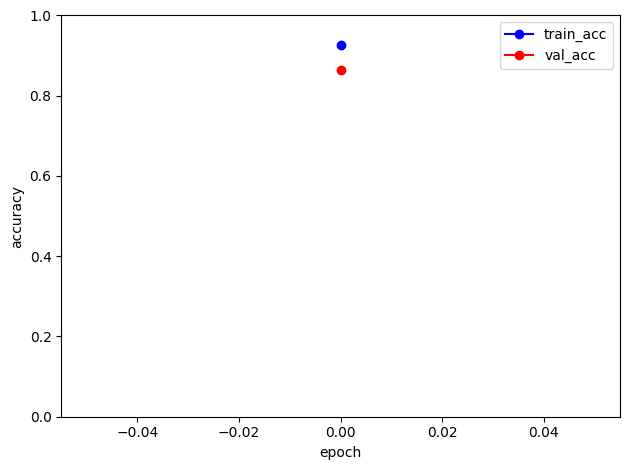

In [ ]:
# train

try:
    # try to import tqdm for progress updates
    from tqdm import tqdm
except ImportError:
    # on failure, make tqdm a noop
    def tqdm(x):
        return x

try:
    # try to import visdom for visualisation of attention weights
    import visdom
    #from helpers import plot_weights

    vis = visdom.Visdom()
except ImportError:
    vis = None
    pass


def val(model, test, vocab, device, epoch_num, path_saving): #加了一个f
    """
        Evaluates model on the test set
    """
    # model.eval() will notify all your layers that you are in eval mode, that way, batchnorm or dropout layers will
    # work in eval model instead of training mode.

    model.eval()
    print("\nValidating..")
    if not vis is None:
        visdom_windows = None
    # impacts the autograd engine and deactivate it. It will reduce memory usage and speed up computations but you
    # won’t be able to backprop (which you don’t want in an eval script).
    with torch.no_grad():
        acc = 0.0
        total = 0.0
        for i, b in enumerate(tqdm(test)):
            if not vis is None and i == 0:
                visdom_windows = plot_weights(model, visdom_windows, b, vocab, vis)
            model_out = model(b.text[0].to(device)).to("cpu").numpy()
            acc += (model_out.argmax(axis=1) == b.label.numpy()).sum()
            total += b.label.size(0)
        with open(path_saving + '_val_results', 'a', encoding='utf-8') as file:
            temp = "epoach:{}, accuracy:{}%, acc, samples/total samples{}/{}".format(epoch_num, acc / total,
                                                  acc, total)
            file.write(temp + '\n')
        print(temp)
    return acc / total


def train(max_length, model_size, epochs, learning_rate, device, num_heads, num_blocks, dropout, train_word_embeddings,
          batch_size, save_path,f): 
    """
        Trains the classifier on the IMDB sentiment dataset
    """

    # random seed
    random.seed(0)
    np.random.seed(0)

    # train start

    train, test, vectors, vocab = get_imdb(batch_size, max_length=max_length)
    # creat the transformer net
    model = Net(model_size=model_size, embeddings=vectors, max_length=max_length, num_heads=num_heads,
                num_blocks=num_blocks, dropout=dropout, train_word_embeddings=train_word_embeddings).to(device)

    optimizer = optim.Adam((p for p in model.parameters() if p.requires_grad), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    best_correct = 0
    with open(save_path + '_train_results', 'a', encoding='utf-8') as file_re:
        for i in range(0, epochs + 1):
            loss_sum = 0.0
            total_correct = 0
            total = 0

            model.train()

            # train data has been spited many batch, tadm: print progress bar
            for j, b in enumerate(iter(tqdm(train))):
                optimizer.zero_grad()
                model_out = model(b.text[0].to(device))
                predictions = torch.argmax(model_out, dim=1)
                total_correct += torch.sum(predictions == b.label.to(device)).item()
                total += len(b.label)

                # calculate loss
                loss = criterion(model_out, b.label.to(device))
                
                # L2 regularization: introduce penalty term to loss function
                l2_loss = torch.tensor(0., requires_grad=True)
                for name, param in model.named_parameters():
                  if 'weight' in name:
                    l2_loss = l2_loss + torch.norm(param, p=2)
                loss = loss + 0.001 * l2_loss

                loss.backward()
                optimizer.step()
                loss_sum += loss.item()
            train_acc = total_correct / total
            print('\n **********************************************')
            loss_temp = "Epoch: {}, Loss mean: {}".format(i, loss_sum / j)
            acc_temp = "Training accuracy: {:.2f}%".format(train_acc * 100)
            file_re.write(loss_temp + acc_temp +'\n')
            print(loss_temp,acc_temp)
            # Validate on test-set every epoch
            if i % 5 == 0:
                val_correct = val(model, test, vocab, device, i, save_path)
            if val_correct > best_correct:
                best_correct = val_correct
                best_model = model
    torch.save(best_model, save_path + '_model.pkl')


if __name__ == "__main__":
    import argparse

    ap = argparse.ArgumentParser(description="Train a Transformer network for sentiment analysis")
    ap.add_argument("--max_length", default=500, type=int, help="Maximum sequence length, sequences longer than this \
                                                                are truncated")
    ap.add_argument("--model_size", default=128, type=int, help="Hidden size for all hidden layers of the model")
    ap.add_argument("--epochs", default=50, type=int, help="Number of epochs to train for")
    ap.add_argument("--learning_rate", default=1e-5, type=float, dest="learning_rate",
                    help="Learning rate for optimizer")
    ap.add_argument("--device", default="cuda:0", dest="device", help="Device to use for training and evaluation \
                                                                      e.g. (cpu, cuda:0)")
    ap.add_argument("--num_heads", default=4, type=int, dest="num_heads", help="Number of attention heads in the \
                                                                               Transformer network")
    ap.add_argument("--num_blocks", default=1, type=int, dest="num_blocks",
                    help="Number of blocks in the Transformer network")
    ap.add_argument("--dropout", default=0.2, type=float, dest="dropout", help="Dropout (not keep_prob, but probability \
                                                            of ZEROING during training, i.e. keep_prob = 1 - dropout)")
    ap.add_argument("--train_word_embeddings", type=bool, default=True, dest="train_word_embeddings",
                    help="Train GloVE word embeddings")
    ap.add_argument("--batch_size", type=int, default=64, help="Batch size")
    ap.add_argument("--save_path", default=r'./res' +time.strftime('%Y-%m-%d-%H-%M-%S', time.localtime(time.time())),
                    dest="save_path",
                    help="The path to save the results")
    ap.add_argument('-f')


    args = vars(ap.parse_args())
    train(**args)
    